In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_excel('https://github.com/wtitze/3E/blob/main/BikeStores.xls?raw=true', sheet_name = 'products')
df

,product_id,product_name,brand_id,category_id,model_year,list_price
0,1,Trek 820 - 2016,9,6,2016.0,379.99
1,2,Ritchey Timberwolf Frameset - 2016,5,6,2016.0,749.99
2,3,Surly Wednesday Frameset - 2016,8,6,2016.0,999.99
3,4,Trek Fuel EX 8 29 - 2016,9,6,2016.0,2899.99
4,5,Heller Shagamaw Frame - 2016,3,6,2016.0,1320.99
...,...,...,...,...,...,...
316,317,Trek Checkpoint ALR 5 - 2019,9,7,2019.0,1999.99
317,318,Trek Checkpoint ALR 5 Women's - 2019,9,7,2019.0,1999.99
318,319,Trek Checkpoint SL 5 Women's - 2019,9,7,2019.0,2799.99
319,320,Trek Checkpoint SL 6 - 2019,9,7,2019.0,3799.99



1. visualizzare il numero di prodotti di cui non si conosce l'anno del modello

In [5]:
df[df['model_year'].isnull()].count()['list_price']

10

2. eliminare i prodotti del punto precedente dal dataframe

In [6]:
df1 = df.dropna()
df1

,product_id,product_name,brand_id,category_id,model_year,list_price
0,1,Trek 820 - 2016,9,6,2016.0,379.99
1,2,Ritchey Timberwolf Frameset - 2016,5,6,2016.0,749.99
2,3,Surly Wednesday Frameset - 2016,8,6,2016.0,999.99
3,4,Trek Fuel EX 8 29 - 2016,9,6,2016.0,2899.99
4,5,Heller Shagamaw Frame - 2016,3,6,2016.0,1320.99
...,...,...,...,...,...,...
316,317,Trek Checkpoint ALR 5 - 2019,9,7,2019.0,1999.99
317,318,Trek Checkpoint ALR 5 Women's - 2019,9,7,2019.0,1999.99
318,319,Trek Checkpoint SL 5 Women's - 2019,9,7,2019.0,2799.99
319,320,Trek Checkpoint SL 6 - 2019,9,7,2019.0,3799.99


3. contare i prodotti che sono stati presenteti (model_year) nel 2017

In [24]:
df1[df1['model_year'] == 2017.0].count()


product_id      85
product_name    85
brand_id        85
category_id     85
model_year      85
list_price      85
dtype: int64

4. visualizzare i prodotti che hanno un category_id compreso tra 2 e 4 (estemi inclusi)

In [8]:
df1[(df1['category_id'] > 1) & (df1['category_id'] < 5)]

,product_id,product_name,brand_id,category_id,model_year,list_price
9,10,Surly Straggler - 2016,8,4,2016.0,1549.00
10,11,Surly Straggler 650b - 2016,8,4,2016.0,1680.99
11,12,Electra Townie Original 21D - 2016,1,3,2016.0,549.99
12,13,Electra Cruiser 1 (24-Inch) - 2016,1,3,2016.0,269.99
13,14,Electra Girl's Hawaii 1 (16-inch) - 2015/2016,1,3,2016.0,269.99
...,...,...,...,...,...,...
309,310,Electra Townie Commute 27D Ladies - 2018,1,2,2018.0,899.99
311,312,Electra Townie Commute 8D Ladies' - 2018,1,2,2018.0,699.99
312,313,Electra Townie Original 1 Ladies' - 2018,1,2,2018.0,449.99
313,314,Electra Townie Original 21D EQ Ladies' - 2018,1,2,2018.0,679.99


5. visualizzare i prodotti che hanno la parola Trek nel nome

In [9]:
df1[df1['product_name'].str.contains('Trek')]

,product_id,product_name,brand_id,category_id,model_year,list_price
0,1,Trek 820 - 2016,9,6,2016.0,379.99
3,4,Trek Fuel EX 8 29 - 2016,9,6,2016.0,2899.99
6,7,Trek Slash 8 27.5 - 2016,9,6,2016.0,3999.99
7,8,Trek Remedy 29 Carbon Frameset - 2016,9,6,2016.0,1799.99
28,29,Trek X-Caliber 8 - 2017,9,6,2017.0,999.99
...,...,...,...,...,...,...
316,317,Trek Checkpoint ALR 5 - 2019,9,7,2019.0,1999.99
317,318,Trek Checkpoint ALR 5 Women's - 2019,9,7,2019.0,1999.99
318,319,Trek Checkpoint SL 5 Women's - 2019,9,7,2019.0,2799.99
319,320,Trek Checkpoint SL 6 - 2019,9,7,2019.0,3799.99


6. visualizzare il numero di prodotti per ogni categoria (visualizzare il numero della categoria e il numero di prodotti)

In [10]:
df1.groupby('category_id')['product_name'].count()


category_id
1    57
2    28
3    76
4    10
5    22
6    59
7    59
Name: product_name, dtype: int64

7. visualizzare le categorie che hanno più di 50 prodotti visualizzare il numero della categoria e il numero di prodotti)

In [11]:
df2 = df1.groupby('category_id')['product_name'].count().reset_index()
df2[df2['product_name'] > 50]


,category_id,product_name
0,1,57
2,3,76
5,6,59
6,7,59


In [34]:
df3 = df1.groupby(['category_id','model_year'])[['product_name']].count()
df3

product_name
category_id model_year              
1           2016.0                 3
            2017.0                19
            2018.0                35
2           2016.0                 3
            2017.0                10
            2018.0                15
3           2016.0                 9
            2017.0                19
            2018.0                48
4           2016.0                 2
            2017.0                 2
            2018.0                 6
5           2017.0                 2
            2018.0                20
6           2016.0                 8
            2017.0                21
            2018.0                30
7           2017.0                12
            2018.0                41
            2019.0                 6

In [35]:
df4 = df3.unstack()
df4

product_name                     
model_year        2016.0 2017.0 2018.0 2019.0
category_id                                  
1                    3.0   19.0   35.0    NaN
2                    3.0   10.0   15.0    NaN
3                    9.0   19.0   48.0    NaN
4                    2.0    2.0    6.0    NaN
5                    NaN    2.0   20.0    NaN
6                    8.0   21.0   30.0    NaN
7                    NaN   12.0   41.0    6.0

In [36]:
df5 = df4['product_name'].reset_index()
df5

model_year,category_id,2016.0,2017.0,2018.0,2019.0
0,1,3.0,19.0,35.0,NaN
1,2,3.0,10.0,15.0,NaN
2,3,9.0,19.0,48.0,NaN
3,4,2.0,2.0,6.0,NaN
4,5,NaN,2.0,20.0,NaN
5,6,8.0,21.0,30.0,NaN
6,7,NaN,12.0,41.0,6.0


8.  visualizzare uno stacked bar chart che riporti il numero di prodotti presentati per ogni anno in ogni categoria. Il grafico deve presentare sulle ascisse il numero della categoria e sulle ordinate il numero di prodotti, divisi per anno

KeyError: ignored

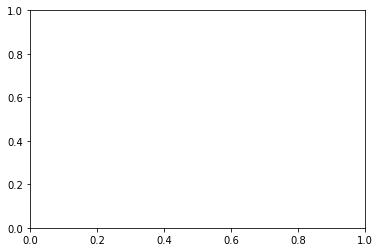

In [56]:
labels = df5.index

fig = plt.figure()
ax = plt.axes()

ax.bar(labels,df5['2016.0'], color='#FF0000')
ax.bar(labels,df5['2017.0'],bottom=df5['2016.0'], color='#FF4500') 
ax.bar(labels,df5['2018.0'],bottom=df5['2016.0'] + df5['2017.0'], color='	#FFFF00') 
ax.bar(labels,df5['2019.0'],bottom=df5['2016.0'] + df5['2017.0'] + df5['2018.0'], color='	#32CD32')

fig.autofmt_xdate(rotation='vertical')

fig.legend(labels=['2016', '2017', '2018', '2019'], loc=0)
plt.show()



In [72]:
df6 = df1.groupby('model_year')['product_name'].count()
df6

model_year
2016.0     25
2017.0     85
2018.0    195
2019.0      6
Name: product_name, dtype: int64

9. visualizzare un pie chart che riporti in numero di prodotti presentati in ogni anno.

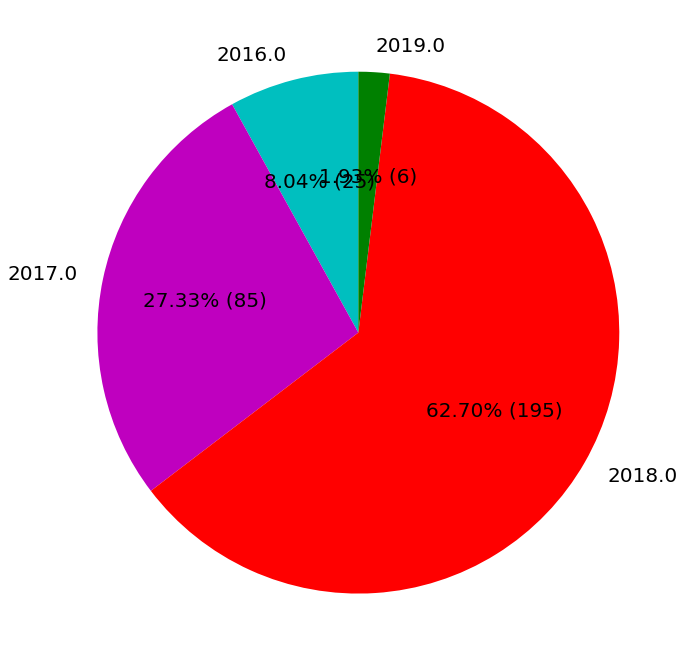

In [76]:


cols = ['c','m','r','g']

plt.rcParams.update({'font.size': 15})   
fig = plt.figure(figsize=[12,12])
ax = plt.axes()

def make_autopct(values):
  def my_autopct(pct):
    total=sum(values)
    val = int(round(pct*total/100.0))
    return '{p:.2f}% ({v:d})'.format(p=pct, v=val)
  return my_autopct

values = list(df6.values)
plt.rcParams.update({'font.size' : 20})


ax.pie(df6.values, labels=df6.index, colors=cols, startangle=90, autopct= make_autopct(values))
plt.show()

10. salvare in un file png i due grafici affiancati

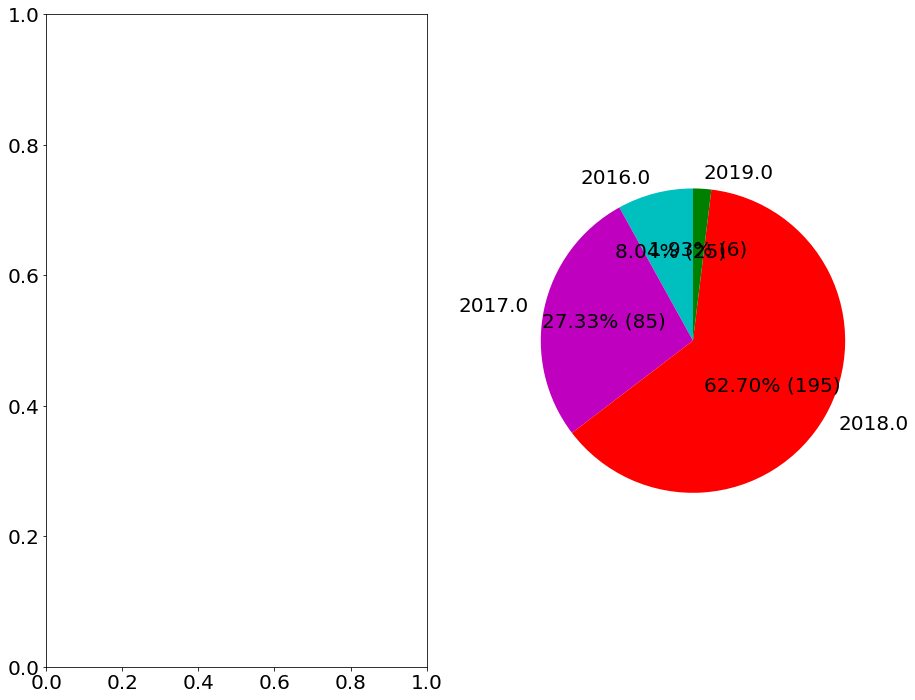

In [81]:
fig, (ax, ax1) = plt.subplots(1,2, figsize= (15,12))

# 1 grafico

ax1.pie(df6.values, labels=df6.index, colors=cols, startangle=90, autopct= make_autopct(values))


plt.show()

In [82]:
fig.savefig('Grafici.png')